### IMPORT  LIBRARIES

In [1]:
import cv2
import tkinter as tk
import os
import pandas as pd
import numpy as np
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers
from keras.models import Sequential
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

2023-05-28 17:18:23.103379: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-28 17:18:23.120655: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-28 17:18:23.225703: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-28 17:18:23.226995: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 17:18:23.762005: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

### DATA CLEANING AND PREPROCESSING

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("Leaves",shuffle =True,image_size = (255, 255), batch_size = 32);

Found 1036 files belonging to 5 classes.


2023-05-28 17:18:28.748124: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-28 17:18:28.749116: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### CHECKING CLASSES PRESENT IN DATASET

In [54]:
dataset.class_names

['Black spot', 'Melanose', 'canker', 'greening', 'healthy']

### COUNT OF IMAGES

In [4]:
dar="/home/admin1/Downloads/Leaves/"
class_names = sorted(os.listdir(dar))
class_dis = [len(os.listdir(dar + name)) for name in class_names]
fig = px.pie(names=class_names, values=class_dis, hole=0.3)
fig.update_layout({"title":{"text":"No of Images in Each Disease", "x":0.50}})
fig.show()

### PLOTTING THE IMAGES

2023-05-28 17:05:35.012421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1036]
	 [[{{node Placeholder/_4}}]]
2023-05-28 17:05:35.013033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1036]
	 [[{{node Placeholder/_4}}]]


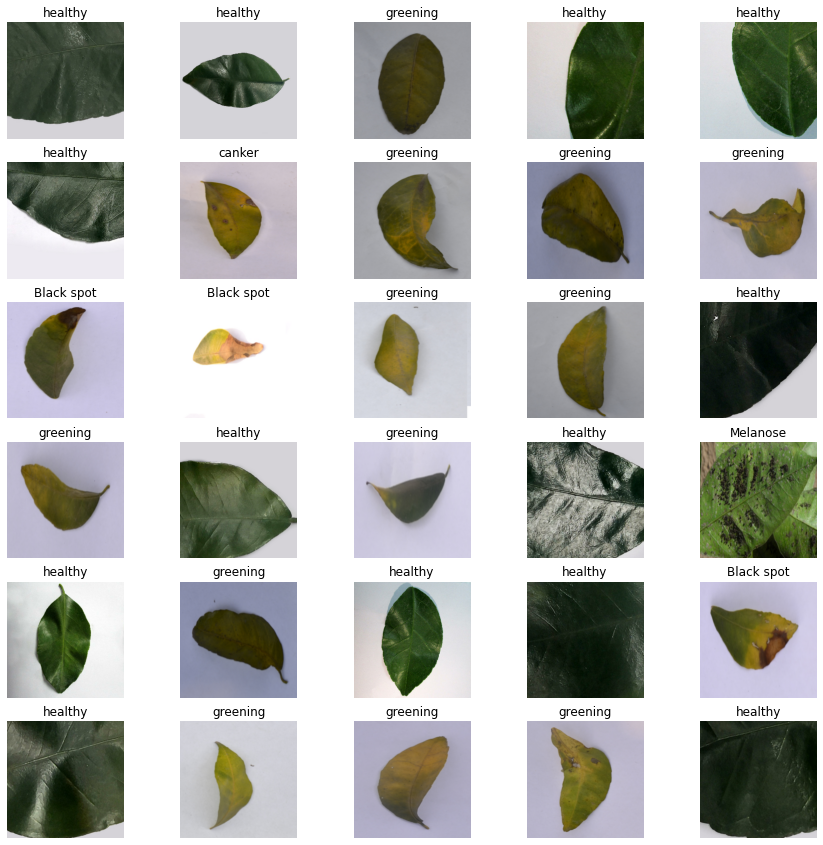

In [56]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
  for i in range(30):
    ax = plt.subplot(6,5,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]]);
    plt.axis("OFF");

### DEFINING DATA FOR TRAINING, TESTING AND VALIDATION

In [3]:
def dataset_partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=8)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size) 
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [4]:
train_data, valid_data, test_data = dataset_partition(dataset)

In [59]:
print("Batches of Training data :- ",len(train_data))

Batches of Training data :-  26


In [60]:
print("Batches of Validation data :- ",len(valid_data))

Batches of Validation data :-  3


In [61]:
print("Batches of Testing data :- ",len(test_data))

Batches of Testing data :-  4


### MODEL BUILDING :- CNN

In [62]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(255, 255),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [63]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [64]:
model = models.Sequential([
    resize_and_rescale,data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(32, 255, 255, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    #multiclass classification
    layers.Dense(5, activation='softmax'),
])


In [65]:
model.build(input_shape=(32, 255, 255, 3))

In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 255, 255, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 255, 255, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 253, 253, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 126, 126, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 124, 124, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [67]:
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [68]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',patience=10,
    mode="max"
)

In [76]:
history = model.fit(train_data, epochs=10,callbacks=early_stopping, validation_data=valid_data,batch_size=32)

Epoch 1/10
26/26 [==============================] - 9s 317ms/step - loss: 0.2647 - accuracy: 0.9150 - val_loss: 0.3931 - val_accuracy: 0.8816
Epoch 2/10
26/26 [==============================] - 8s 308ms/step - loss: 0.2384 - accuracy: 0.9212 - val_loss: 0.1802 - val_accuracy: 0.9271
Epoch 3/10
26/26 [==============================] - 9s 325ms/step - loss: 0.1662 - accuracy: 0.9483 - val_loss: 0.0553 - val_accuracy: 1.0000
Epoch 4/10
26/26 [==============================] - 9s 310ms/step - loss: 0.1548 - accuracy: 0.9532 - val_loss: 0.2419 - val_accuracy: 0.9271
Epoch 5/10
26/26 [==============================] - 9s 324ms/step - loss: 0.1621 - accuracy: 0.9387 - val_loss: 0.1179 - val_accuracy: 0.9688
Epoch 6/10
26/26 [==============================] - 9s 320ms/step - loss: 0.1469 - accuracy: 0.9532 - val_loss: 0.1781 - val_accuracy: 0.9479
Epoch 7/10
26/26 [==============================] - 9s 330ms/step - loss: 0.1636 - accuracy: 0.9483 - val_loss: 0.1344 - val_accuracy: 0.9583
Epoch 

### MODEL EVALUATION

In [77]:
los,acc = model.evaluate(valid_data);
print("Loss is :-",los)
print("Accuracy is :-",acc)

3/3 [==============================] - 1s 93ms/step - loss: 0.0765 - accuracy: 0.9792
Loss is :- 0.07654262334108353
Accuracy is :- 0.9791666865348816


### ACCURACY OF MODEL

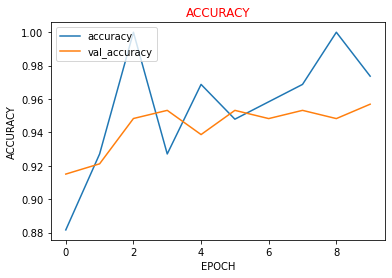

In [78]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("ACCURACY",color="red")
plt.ylabel("ACCURACY")
plt.xlabel("EPOCH")
plt.legend(['accuracy','val_accuracy'],loc='upper left')
plt.show()

### LOSS OF MODEL

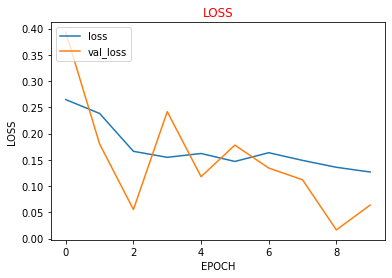

In [79]:
# loss of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("LOSS",color="red")
plt.ylabel("LOSS")
plt.xlabel("EPOCH")
plt.legend(['loss','val_loss'],loc='upper left')
plt.show()   

In [80]:
def predict(img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict (img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    return predicted_class

In [81]:
y_tru=[]
y_predicted=[]
for i in range(len(test_data)):
    for images,labels in test_data.take(1):
        for i in range(32):
            predicted_class= predict(images[i].numpy())
            actual_class = class_names[labels[i]]
            y_tru.append(actual_class)
            y_predicted.append(predicted_class)

2023-05-28 17:17:11.822163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1036]
	 [[{{node Placeholder/_4}}]]
2023-05-28 17:17:11.823026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1036]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 13ms/step


2023-05-28 17:17:14.347980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1036]
	 [[{{node Placeholder/_4}}]]
2023-05-28 17:17:14.348217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1036]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 0s 23ms/step


2023-05-28 17:17:16.142046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1036]
	 [[{{node Placeholder/_4}}]]
2023-05-28 17:17:16.142616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1036]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 12ms/step


2023-05-28 17:17:18.487093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1036]
	 [[{{node Placeholder/_4}}]]
2023-05-28 17:17:18.487327: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1036]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 0s 40ms/step


In [82]:
# Prediction of first 10 labels in testing data
y_pre=model.predict(test_data)
y_predict=[np.argmax(i) for i in y_pre]
ls=[]
for i in y_predict[:10]:
    if i==0:
        ls.append("Black Spot")
    elif i==1:
        ls.append("Canker")
    elif i==2:
        ls.append("Greening")
    elif i==3:
        ls.append("Healthy")
    else:
        ls.append("Mealnose")
print("Predicted Classes :-\n",ls)

4/4 [==============================] - 1s 128ms/step
Predicted Classes :-
 ['Black Spot', 'Healthy', 'Greening', 'Mealnose', 'Healthy', 'Mealnose', 'Mealnose', 'Greening', 'Mealnose', 'Mealnose']


### CONFUSION MATRIX

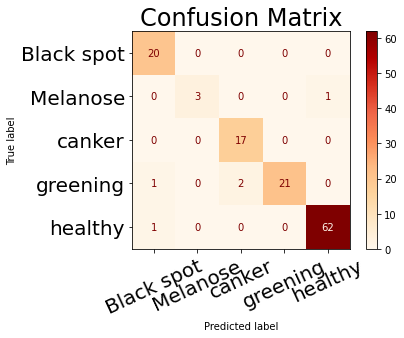

In [83]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_tru,y_predicted,labels=dataset.class_names)
display_c_m = ConfusionMatrixDisplay(c, display_labels=dataset.class_names)
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Confusion Matrix', fontsize=24);

In [84]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_tru,y_predicted,labels=dataset.class_names)
print("Confusion Matrix :-\n",c)
print("\n")

Confusion Matrix :-
 [[20  0  0  0  0]
 [ 0  3  0  0  1]
 [ 0  0 17  0  0]
 [ 1  0  2 21  0]
 [ 1  0  0  0 62]]




### CLASSIFICATION REPORT

In [85]:
report = classification_report(y_tru,y_predicted,labels=dataset.class_names,target_names=dataset.class_names)
print("Classification Report:-\n",report);

Classification Report:-
               precision    recall  f1-score   support

  Black spot       0.91      1.00      0.95        20
    Melanose       1.00      0.75      0.86         4
      canker       0.89      1.00      0.94        17
    greening       1.00      0.88      0.93        24
     healthy       0.98      0.98      0.98        63

    accuracy                           0.96       128
   macro avg       0.96      0.92      0.93       128
weighted avg       0.96      0.96      0.96       128



2023-05-28 17:17:46.230371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1036]
	 [[{{node Placeholder/_0}}]]
2023-05-28 17:17:46.231216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1036]
	 [[{{node Placeholder/_4}}]]


First image of batch to predict :
Actual label :  canker
1/1 [==============================] - 0s 112ms/step
Predicted label :  canker


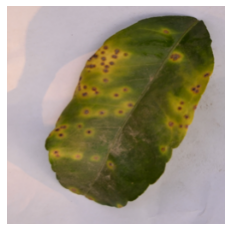

In [86]:
for batch_image, batch_label in train_data.take(1):
    first_image = batch_image[0].numpy().astype('uint8')
    first_label = dataset.class_names[batch_label[0]]
    
    print('First image of batch to predict :')
    plt.imshow(first_image)
    print('Actual label : ', first_label)
    
    batch_prediction = model.predict(batch_image)
    prediction = dataset.class_names[np.argmax(batch_prediction[0])]
    print('Predicted label : ', prediction)
    plt.axis('off');
    
    


In [87]:
model.save('my_model.h5')

## VGG16 MODEL

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
model = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_shape=(255, 255, 3),
    classes=5
)

In [7]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [8]:
early_stoppings = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',patience=10,
    mode="max"
)

### MODEL BUILDING :- VGG16

In [20]:
# fit the model
history_model = model.fit_generator(
  train_data,
  validation_data=valid_data,
  epochs=5,
  steps_per_epoch=len(train_data),
  validation_steps=len(valid_data))

Epoch 1/5


/tmp/ipykernel_26737/3980585912.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_model = model.fit_generator(


11/26 [===========>..................] - ETA: 1:34 - loss: 0.7953 - accuracy: 0.6989

KeyboardInterrupt: 

### MODEL EVALUATION

In [16]:
los,acc = model.evaluate(valid_data);
print("Loss is :-",los)
print("Accuracy is :-",acc)

3/3 [==============================] - 6s 2s/step - loss: 0.3753 - accuracy: 0.8542
Loss is :- 0.3752610385417938
Accuracy is :- 0.8541666865348816


### ACCURACY OF MODEL

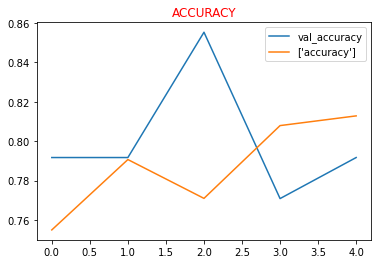

In [17]:
import matplotlib.pyplot as plt ### visualisation
plt.plot(history_model.history['val_accuracy'])
plt.title("ACCURACY",color="red")
plt.plot(history_model.history['accuracy'])
plt.legend(['val_accuracy',['accuracy']])
plt.show()

### LOSS OF MODEL

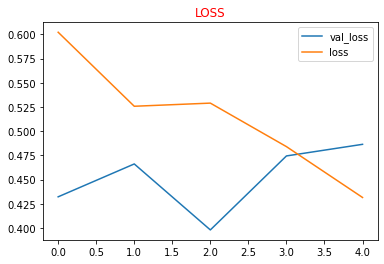

In [18]:
import matplotlib.pyplot as plt ### visualisation
plt.plot(history_model.history['val_loss'])
plt.title("LOSS",color="red")
plt.plot(history_model.history['loss'])
plt.legend(['val_loss','loss'])
plt.show()

In [19]:
val_loss, val_acc = model.evaluate(test_data)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

2023-05-28 18:31:56.477056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1036]
	 [[{{node Placeholder/_4}}]]
2023-05-28 18:31:56.477875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1036]
	 [[{{node Placeholder/_4}}]]


4/4 [==============================] - 8s 2s/step - loss: 0.4837 - accuracy: 0.8438
Validation loss: 0.4837091863155365
Validation accuracy: 0.84375


## GUI TKINTER

In [39]:
form = tk.Tk()
form.geometry("1000x500")
form.title('Citrus Plant Disease Classification and Recommendation System Using Deep Learning')
form.resizable(False, False)
my_font1 = ('times', 18, 'bold',)
my_font2 = ('times', 15, 'bold')
l1 = tk.Label(form, text='Citrus Plant Disease Classification and Recommendation System Using Deep Learning', 
              width=70, font=my_font1, bg='white', fg='green', padx = 10, pady = 5)
l1.grid(row=1, column=1)
b1 = tk.Button(form, text='Upload Leaf Image',
               width=20, command=lambda: upload_file())
b1.grid(row=3, column=1)
l2 = tk.Label(form)
l2.grid(row=5, column=1)
l3 = tk.Label(form)
l3.grid(row=11, column=1)

def upload_file():
    global img
    f_types = [('Image Files', '*.png;*.jpg;*.jpeg')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    img = Image.open(filename)
    img.save("leaf.png")
    img_resized = img.resize((255, 255))
    img = ImageTk.PhotoImage(img_resized)
    l2.config(image=img)
    l2.image = img
    b3 = tk.Button(form, text='Predict',
                   width=20, command=lambda: prediction())
    b3.grid(row=9, column=1)

def prediction():
    model =  models.load_model("my_model.h5")
    class_names = ['Black spot', 'Melanose', 'canker', 'greening', 'healthy']
    img = cv2.imread("leaf.png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (255, 255))
    img = (np.expand_dims(img,0))
    weights = model.predict(img)
    img_prediction = weights.argmax(axis=1)[0]
    prediction = class_names[img_prediction]
    l3.config(text=f"Prediction: {prediction}", font=my_font2, fg="green")    
    l4 = tk.Text(form, wrap=WORD, width=90, height=5, fg="green")
    l4.delete('1.0', END)    
    if prediction != "healthy":
            treatments = read_csv("treatments.csv")       
            treatment = (treatments.loc[treatments['disease'] == prediction]).values.tolist() 
            l3.config(fg="red")    
            l4.insert(INSERT, f"Recommendation(Treatment) : {treatment[0][1]}") 
            l4.config(fg="red")
    else:
          l4.insert(INSERT, f"\t\tNo Disease Detected.")     
    l4.config(state=DISABLED, highlightthickness = 0, borderwidth=0, bg='#f0f0f0')
    l4.grid(row=20, column=1)
           
form.mainloop()